# Packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
from bokeh.palettes import RdYlBu11 as palette

import geopandas as gpd
import pysal as ps
import mapclassify as mc
from fiona.crs import from_epsg

import os
os.getcwd()

'c:\\Users\\gilramolete\\OneDrive - UNIONBANK of the Philippines\\Documents 1\\Geospatial Analysis\\Automating GIS Processes'

# Static maps in Geopandas

We have already seen during the previous lessons quite many examples how to create static maps using Geopandas.

Thus, we won’t spend too much time repeating making such maps but let’s create a one with more layers on it than just one which kind we have mostly done this far.

Let’s create a static accessibility map with roads and metro line on it.

In [44]:
# Filepaths
grids_fp = 'data/L6/L6_data/TravelTimes_to_5975375_RailwayStation.shp'
roads_fp = 'data/L6/L6_data/roads.shp'
metro_fp = 'data/L6/L6_data/metro.shp'

# Read files
grid = gpd.read_file(grids_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

# Get the CRS of the grid
gridCRS = grid.crs

# Reproject geometries using the crs of the travel time grid
roads['geometry'] = roads['geometry'].to_crs(crs = gridCRS)
metro['geometry'] = metro['geometry'].to_crs(crs = gridCRS)

display(grid.head())
display(roads.head())
display(metro.head())

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


,NIMI,NIMI0,NRO,MTRYHM,geometry
0,Moottoriväylä,Porvoon väylä,1,80,"LINESTRING (393728.427 6681154.998, 392904.053..."
1,Moottoriväylä,Kehä III,1,80,"LINESTRING (397985.813 6679479.735, 397911.001..."
2,Moottoriväylä,Kehä III,1,80,"LINESTRING (396265.947 6681573.689, 396186.164..."
3,Moottoriväylä,Kehä III,1,80,"LINESTRING (395005.715 6682867.420, 394936.946..."
4,Moottoriväylä,Kehä III,1,80,"LINESTRING (394249.617 6683523.100, 394174.017..."


,NUMERO,SUUNTA,geometry
0,1300M,1,"LINESTRING (395360.779 6679514.893, 393873.816..."
1,1300M,2,"LINESTRING (384224.084 6671360.824, 384451.783..."
2,1300M1,1,"LINESTRING (395360.779 6679514.893, 393873.816..."
3,1300M1,2,"LINESTRING (393484.507 6676347.867, 393637.118..."
4,1300M2,1,"LINESTRING (393484.507 6676347.867, 393178.960..."


We can make a visualization using the `.plot()` function in Geopandas.

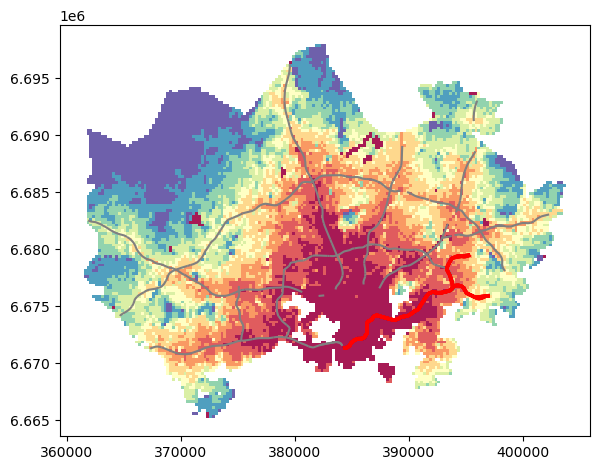

In [45]:
# Visualize the travel times into 9 classes using "Quantiles" classification scheme
    # Add also  a little bit of transparency with 'alpha' parameter
    # (ranges from 0 to 1 where 0 is fully transparent and 1 has no transparency)
my_map = grid.plot(column = 'car_r_t', linewidth = 0.05, cmap = 'Spectral', scheme = 'quantiles', k = 9, alpha = 0.9)

# Add roads on top of the grid
roads.plot(ax = my_map, color = 'grey', linewidth = 1.5)

# Add metro on top of the previous map
metro.plot(ax = my_map, color = 'red', linewidth = 2.5)

# Remove the empty white space
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = r'data/L6/static_map.png'
plt.savefig(outfp, dpi = 300)
plt.show()

# Interactive maps with Bokeh

## Simple interactive point plot

First, we learn the basic logic of plotting in Bokeh by making a simple interactive plot with few points. We need to initialize our plot by calling the `figure` object.

In [46]:
# Initialize the plot (p) and give it a title
p = figure(title = 'My first interactive plot!')

# Let's see what it is
p

figure(id='p1884', ...)

In [47]:
# Create a list of x-coordinates
x_coords = [0, 1, 2, 3, 4]

# Create a list of y-coordinates
y_coords = [5, 4, 1, 2, 0]

# Plot the points
p.circle(x = x_coords, y = y_coords, size = 10, color = 'red')

GlyphRenderer(id='p1940', ...)

We can save our interactive plot into the disk with `save` function that we imported in the beginning. All interactive plots are typically saved as `html` files which you can open in a web-browser.

In [48]:
# Give output filepath
outfp = 'data/L6/points.html'

# Save the plot by passing the plot object and output path
save(obj = p, filename = outfp)

C:\Users\gilramolete\AppData\Local\Temp\ipykernel_4348\1614721435.py:5: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(obj = p, filename = outfp)
C:\Users\gilramolete\AppData\Local\Temp\ipykernel_4348\1614721435.py:5: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(obj = p, filename = outfp)


'c:\\Users\\gilramolete\\OneDrive - UNIONBANK of the Philippines\\Documents 1\\Geospatial Analysis\\Automating GIS Processes\\data\\L6\\points.html'

It is **interactive**. You can drag the plot by clicking with left mouse and dragging. There are also specific buttons on the right side of the plot by default which you can select on and off:
- **Pan button** allows you to switch the dragging possibility on and off (on by default)
- **BoxZoom button** allows you to zoom into an area that you define by left dragging with mouse an area of your interest
- **Save button** allows you to save your interactive plot as a static low resolution `.png` file
- **WheelZoom button** allows you to use the mouse wheel to zoom in and out
- **Reset button** allows you to reset the plot as it was in the beginning

## Creating interactive maps using Bokeh and Geopandas

Now we now khow how to make a really simple interactive point plot using Bokeh. What about creating such a map from a Shapefile of points? Of course we can do that, and we can use Geopandas for achieving that goal which is nice!

Creating an interactive Bokeh map from Shapefile(s) contains typically following steps:
1. Read the Shapefile into GeoDataFrame
2. **Calculate the x and y coordinates** of the geometries into separate columns
3. Convert the GeoDataFrame into a **Bokeh DataSource**
4. Plot the x and y coordinates as points, lines or polygons (which are in Bokeh words: *circle*, *multi_line*, and *patches*)

Let’s practice these things and see how we can first create an interactive point map, then a map with lines, and finally a map with polygons where we also add those points and lines into our final map.

In [49]:
points_fp = 'data/L6/L6_data/addresses.shp'
points = gpd.read_file(points_fp)
points.head()

,address,id,geometry
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.93017 60.16837)
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.94189 60.16987)
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (24.97740 60.18736)
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25.09196 60.21448)
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.92148 60.15658)


So we have the address and id columns plus the geometry column as attributes.

Now, as a second step, we need to calculate the x and y coordinates of those points. Unfortunately there is not a ready made function in geopandas to do that.

Thus, let’s create our own function called `getPointCoords()` which will return the x or y coordinate of a given geometry. It shall have two parameters: `geom` and `coord_type` where the first one should be a Shapely geometry object and coord_type should be either `'x'` or `'y'`.

In [50]:
def getPointCoords(row, geom, coord_type):
    '''Calculates coordinates of a Point geometry'''
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y
    else:
        return "?"

In [51]:
# Calculate x coordinates
points['x'] = points.apply(getPointCoords, geom = 'geometry', coord_type = 'x', axis = 1)

# Calculate y coordinates
points['y'] = points.apply(getPointCoords, geom = 'geometry', coord_type = 'y', axis = 1)

points.head()

,address,id,geometry,x,y
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.93017 60.16837),24.930170,60.168373
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.94189 60.16987),24.941893,60.169866
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (24.97740 60.18736),24.977400,60.187359
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25.09196 60.21448),25.091964,60.214481
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.92148 60.15658),24.921485,60.156578


Now we have the x and y columns in our GeoDataFrame.

The third step, is to convert our DataFrame into a format that Bokeh can understand. Thus, we will convert our DataFrame into `ColumnDataSource` which is a Bokeh-specific way of storing the data.

Note - Bokeh `ColumnDataSource` do not understand Shapely geometry -objects. Thus, we need to remove the `geometry` column before convert our DataFrame into a ColumnDataSouce.

In [52]:
# Make a copy and drop the geometry column
p_df = points.drop('geometry', axis = 1).copy()
p_df.head()

,address,id,x,y
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,24.930170,60.168373
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,24.941893,60.169866
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,24.977400,60.187359
3,"Itäväylä, 00900 Helsinki, Finland",1004,25.091964,60.214481
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,24.921485,60.156578


In [53]:
# Point DataSource
psource = ColumnDataSource(p_df)
psource

ColumnDataSource(id='p2117', ...)

So now we have a ColumnDataSource object that has our data stored in a way that Bokeh wants it.

Finally, we can make a Point map of those points in a fairly similar manner as in the first example. Now instead of passing the coordinate lists, we can pass the data as a `source` for the plot with column names containing those coordinates.

In [54]:
# Initialize our plot figure
p = figure(title = 'A map of address points from a Shapefile')

# Add the points to the map from our 'psource' ColumnDataSource object
p.circle('x', 'y', source = psource, color = 'red', size = 10)

outfp = 'data/L6/point_map.html'
save(p, outfp)

C:\Users\gilramolete\AppData\Local\Temp\ipykernel_4348\158704828.py:8: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(p, outfp)
C:\Users\gilramolete\AppData\Local\Temp\ipykernel_4348\158704828.py:8: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(p, outfp)


'c:\\Users\\gilramolete\\OneDrive - UNIONBANK of the Philippines\\Documents 1\\Geospatial Analysis\\Automating GIS Processes\\data\\L6\\point_map.html'

In Bokeh there are specific set of plot tools that you can add to the plot. Actually all the buttons that you see on the right side of the plot are exactly such tools. It is e.g. possible to interactively show information about the plot objects to the user when placing mouse over an object as you can see from the example on top of this page. The tool that shows information from the plot objects is an inspector called HoverTool that annotate or otherwise report information about the plot, based on the current cursor position.

Let’s see now how this can be done.

In [55]:
my_hover = HoverTool()
my_hover.tooltips = [('Address of the point', '@address')]
my_hover

HoverTool(id='p2354', ...)

From the above we can see that tooltip should be defined with a list of tuple(s) where the first item is the name or label for the information that will be shown, and the second item is the column-name where that information should be read in your data. The `@` character in front of the column-name is important because it tells that the **information should be taken from a column named as the text that comes after the character**.

In [56]:
p.add_tools(my_hover)

outfp = 'data/L6/point_map_hover.html'
save(p, outfp)

C:\Users\gilramolete\AppData\Local\Temp\ipykernel_4348\3374960366.py:4: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(p, outfp)
C:\Users\gilramolete\AppData\Local\Temp\ipykernel_4348\3374960366.py:4: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(p, outfp)


'c:\\Users\\gilramolete\\OneDrive - UNIONBANK of the Philippines\\Documents 1\\Geospatial Analysis\\Automating GIS Processes\\data\\L6\\point_map_hover.html'

As you can see now the plot shows information about the points and the content is the information derived from column address.

Of course, you can show information from multiple columns at the same time. This is achieved simply by adding more tooltip variables when defining the tooltips, such as:
```my_hover2.tooltips = [('Label1', '@col1'), ('Label2', '@col2'), ('Label3', '@col3')]```

Now we have made a nice point map out of a Shapefile. Let’s see how we can make an interactive map out of a Shapefile that represents metro lines in Helsinki. We follow the same steps than before, i.e.
1. Read the data,
2. Calculate x and y coordinates,
3. Convert the DataFrame into a ColumnDataSource, and
4. Make the map and save it as html.

In [57]:
metro_fp = 'data/L6/L6_data/metro.shp'
metro = gpd.read_file(metro_fp)
metro.head()

,NUMERO,SUUNTA,geometry
0,1300M,1,"LINESTRING (2561676.997 6681346.002, 2560202.9..."
1,1300M,2,"LINESTRING (2550919.002 6672692.002, 2551145.9..."
2,1300M1,1,"LINESTRING (2561676.997 6681346.002, 2560202.9..."
3,1300M1,2,"LINESTRING (2559946.004 6678095.998, 2560094.9..."
4,1300M2,1,"LINESTRING (2559946.004 6678095.998, 2559644.0..."


So we have the address and id columns plus the geometry column as attributes. Second step is where calculate the x and y coordinates of the nodes of our lines.

Let’s create our own function called `getLineCoords()` in a similar manner as previously but now we need to modify it a bit so that we can get coordinates out of the Shapely LineString object.

In [58]:
def getLineCoords(row, geom, coord_type):
    '''Returns a list of coordinates of a LineString geometry'''
    if coord_type == 'x':
        return list(row[geom].coords.xy[0])
    elif coord_type == 'y':
        return list(row[geom].coords.xy[1])
    else:
        return "?"

In [59]:
# Calculate x coordinates of the line
metro['x'] = metro.apply(getLineCoords, geom = 'geometry', coord_type = 'x', axis = 1)

# Calculate y coordinates of the line
metro['y'] = metro.apply(getLineCoords, geom = 'geometry', coord_type = 'y', axis = 1)

metro.head()

,NUMERO,SUUNTA,geometry,x,y
0,1300M,1,"LINESTRING (2561676.997 6681346.002, 2560202.9...","[2561676.997249531, 2560202.997150008, 2560127...","[6681346.001954339, 6681016.996685321, 6680969..."
1,1300M,2,"LINESTRING (2550919.002 6672692.002, 2551145.9...","[2550919.001803585, 2551145.9991329825, 255126...","[6672692.002113477, 6672713.997145447, 6672737..."
2,1300M1,1,"LINESTRING (2561676.997 6681346.002, 2560202.9...","[2561676.997249531, 2560202.997150008, 2560127...","[6681346.001954339, 6681016.996685321, 6680969..."
3,1300M1,2,"LINESTRING (2559946.004 6678095.998, 2560094.9...","[2559946.003624604, 2560094.9990514405, 256018...","[6678095.998426503, 6678179.9976436375, 667824..."
4,1300M2,1,"LINESTRING (2559946.004 6678095.998, 2559644.0...","[2559946.003624604, 2559644.0031698933, 255947...","[6678095.998426503, 6678008.998522878, 6677957..."


In [60]:
# Make a copy and drop the geometry column
m_df = metro.drop('geometry', axis = 1).copy()

# Point DataSource
msource = ColumnDataSource(m_df)
msource

ColumnDataSource(id='p2532', ...)

In [61]:
# Initialize our plot figure
p = figure(title = 'A map of the Helsinki metro')

# Add the lines to the map from our 'msource' ColumnDataSource object
p.multi_line('x', 'y', source = msource, color = 'red', line_width = 3)

outfp = 'data/L6/metro_map.html'
save(p, outfp)

C:\Users\gilramolete\AppData\Local\Temp\ipykernel_4348\3364612222.py:8: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(p, outfp)
C:\Users\gilramolete\AppData\Local\Temp\ipykernel_4348\3364612222.py:8: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(p, outfp)


'c:\\Users\\gilramolete\\OneDrive - UNIONBANK of the Philippines\\Documents 1\\Geospatial Analysis\\Automating GIS Processes\\data\\L6\\metro_map.html'

It is of course possible to add different layers on top of each other. Let’s visualize a map showing accessibility in Helsinki Region and place a metro line and the address points on top of that.

In [62]:
# File paths
grid_fp = 'data/L6/L6_data/TravelTimes_to_5975375_RailwayStation.shp'
point_fp = 'data/L6/L6_data/addresses.shp'
metro_fp = 'data/L6/L6_data/metro.shp'

# Read files
grid = gpd.read_file(grid_fp)
point = gpd.read_file(point_fp)
metro = gpd.read_file(metro_fp)

# Get the CRS of our grid
CRS = grid.crs
print(CRS)

# Convert geometries
points['geometry'] = points['geometry'].to_crs(crs = CRS)
metro['geometry'] = metro['geometry'].to_crs(crs = CRS)

epsg:3067


In [63]:
display(grid)
display(points)
display(metro)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,25074,41,25096,47,6016698,23759,59,80,24627,58,76,5975375,22593,323,"POLYGON ((373000.000 6665500.000, 372750.000 6..."
13227,24761,43,24784,49,6016699,23886,61,80,24754,59,76,5975375,22720,325,"POLYGON ((373250.000 6665500.000, 373000.000 6..."
13228,-1,-1,-1,-1,6018252,-1,-1,-1,-1,-1,-1,-1,-1,-1,"POLYGON ((372500.000 6665250.000, 372250.000 6..."
13229,25251,42,25273,48,6018253,24116,64,80,24984,63,76,5975375,22950,328,"POLYGON ((372750.000 6665250.000, 372500.000 6..."


,address,id,geometry,x,y
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (385149.448 6671962.670),24.930170,60.168373
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (385804.985 6672108.604),24.941893,60.169866
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (387834.367 6673995.246),24.977400,60.187359
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (394273.706 6676825.896),25.091964,60.214481
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (384626.273 6670664.629),24.921485,60.156578
5,"Kontulantie 18, 00940 Helsinki, Finland",1006,POINT (393770.705 6679114.808),25.081692,60.234891
6,"Itäväylä, 00800 Helsinki, Finland",1007,POINT (391482.283 6675671.507),25.042239,60.203388
7,"Tapulikaupungintie 3, 00750 Helsinki, Finland",1008,POINT (391367.151 6683698.531),25.035855,60.275389
8,"Sompionpolku 2, 00730 Helsinki, Finland",1009,POINT (390954.097 6682372.572),25.029108,60.263380
9,"Atomitie 5, 00370 Helsinki, Finland",1010,POINT (382108.753 6678084.490),24.871860,60.222436


,NUMERO,SUUNTA,geometry
0,1300M,1,"LINESTRING (395360.779 6679514.893, 393873.816..."
1,1300M,2,"LINESTRING (384224.084 6671360.824, 384451.783..."
2,1300M1,1,"LINESTRING (395360.779 6679514.893, 393873.816..."
3,1300M1,2,"LINESTRING (393484.507 6676347.867, 393637.118..."
4,1300M2,1,"LINESTRING (393484.507 6676347.867, 393178.960..."
5,1300M2,2,"LINESTRING (384224.084 6671360.824, 384451.783..."
6,1300M3,1,"LINESTRING (395360.779 6679514.893, 393873.816..."
7,1300M3,2,"LINESTRING (384224.084 6671360.824, 384451.783..."
8,1300V,1,"LINESTRING (397067.533 6675939.791, 396727.855..."
9,1300V,2,"LINESTRING (384224.084 6671360.824, 384451.783..."


In [64]:
def getPolyCoords(row, geom, coord_type):
    '''Returns coordinates of edges of a Polygon exterior'''
    # Parse exterior of coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        return list(exterior.coords.xy[0])
    elif coord_type == 'y':
        return list(exterior.coords.xy[1])
    else:
        return '?'

In [66]:
# Get the Polygon x and y coordinates
grid['x'] = grid.apply(getPolyCoords, geom = 'geometry', coord_type = 'x', axis = 1)
grid['y'] = grid.apply(getPolyCoords, geom = 'geometry', coord_type = 'y', axis = 1)

# Calculate x and y coordinates of the line
metro['x'] = metro.apply(getLineCoords, geom = 'geometry', coord_type = 'x', axis = 1)
metro['y'] = metro.apply(getLineCoords, geom = 'geometry', coord_type = 'y', axis = 1)

# Calculate x and y coordinates of the points
points['x'] = points.apply(getPointCoords, geom = 'geometry', coord_type = 'x', axis = 1)
points['y'] = points.apply(getPointCoords, geom = 'geometry', coord_type = 'y', axis = 1)

# Replace No Data values (-1) with large number
grid = grid.replace(-1, 999)

# Classify travel times into 5 minute classes until 200 minutes
breaks = [x for x in range(5, 200, 5)]

# Initialize the classifier and apply it
classifier = mc.UserDefined.make(bins = breaks)
pt_classif = grid[['pt_r_tt']].apply(classifier)

# Rename the classified column
pt_classif.columns = ['pt_r_tt_ud']

# Join it back to the grid layer
grid = grid.join(pt_classif)

grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry,x,y,pt_r_tt_ud
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6...","[382000.00013586413, 381750.0001359122, 381750...","[6697750.000038058, 6697750.000038066, 6698000...",27
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6...","[382250.0001358146, 382000.00013586413, 382000...","[6697750.000038053, 6697750.000038058, 6698000...",26
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6...","[382500.0001357661, 382250.0001358146, 382250....","[6697750.000038046, 6697750.000038053, 6698000...",26
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6...","[382750.0001357181, 382500.0001357661, 382500....","[6697750.000038039, 6697750.000038046, 6698000...",28
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6...","[381250.0001360176, 381000.00013606605, 381000...","[6697500.000038121, 6697500.0000381265, 669775...",24


Alright, so we have many columns but the new one that we just got is the last one, i.e. pt_r_tt_ud that contains the classes that we reclassified based on the public transportation travel times on 5 minute intervals.

Let’s now convert our GeoDataFrames into Bokeh ColumnDataSources (without geometry columns). Then, for visualizing the Polygons we need to define the color palette that we are going to use. There are many different ones available but we are now going to use a palette called `RdYlBu` and use eleven color-classes for the values (defined as `RdYlBu11`). Let’s prepare our color_mapper. Now we are ready to visualize our polygons and add the metro line and the points on top of that. Polygons are visualized using `patches` objects in Bokeh.

In [68]:
# Make a copy, drop the geometry column and create ColumnDataSource
m_df = metro.drop('geometry', axis = 1).copy()
p_df = points.drop('geometry', axis = 1).copy()
g_df = grid.drop('geometry', axis = 1).copy()

msource = ColumnDataSource(m_df)
psource = ColumnDataSource(p_df)
gsource = ColumnDataSource(g_df)

# Create color mapper
color_mapper = LogColorMapper(palette = palette)

# Initialize our figure
p = figure(title = 'Travel times with Public transportation to Central Railway station')

# Plot grid
p.patches('x', 'y', source = gsource,
        fill_color = {'field': 'pt_r_tt_ud', 'transform': color_mapper},
        fill_alpha = 1.0, line_color = 'black', line_width = 0.1)

# Add metro on top of the same figure
p.multi_line('x', 'y', source = msource, color = 'red', line_width = 0.2)

# Add points on top (as black points)
p.circle('x', 'y', size = 5, source = psource, color = 'black')

# Save the figure
outfp = 'data/L6/travel_time_map.html'
save(p, outfp)

C:\Users\gilramolete\AppData\Local\Temp\ipykernel_4348\506575336.py:29: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(p, outfp)
C:\Users\gilramolete\AppData\Local\Temp\ipykernel_4348\506575336.py:29: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(p, outfp)


'c:\\Users\\gilramolete\\OneDrive - UNIONBANK of the Philippines\\Documents 1\\Geospatial Analysis\\Automating GIS Processes\\data\\L6\\travel_time_map.html'

# Interactive maps on Leaflet

Whenever you go into a website that has some kind of interactive map, it is quite probable that you are wittnessing a map that has been made with a JavaScipt library called [Leaflet](http://leafletjs.com/) (the other popular one that you might have wittnessed is called [OpenLayers](https://openlayers.org/)).

There is also a Python module called [Folium](https://github.com/python-visualization/folium) that makes it possible visualize data that’s been manipulated in Python on an interactive Leaflet map.

## Creating a simple interactive web-map

Let’s first see how we can do a simple interactive web-map without any data on it. We just visualize OpenStreetMap on a specific location of the a world.

The first parameter `location` takes a pair of lat, lon values as list as an input which will determine where the map will be positioned when user opens up the map. `zoom_start` parameter adjusts the default zoom-level for the map (the higher the number the closer the zoom is). `control_scale` defines if map should have a scalebar or not.

Take a look at the map by clicking it with right mouse and open it with Google Chrome which then opens it up in a web browser.

In [74]:
# Create map instance
m = folium.Map(location = [60.25, 24.8],
            zoom_start = 10, control_scale = True)

outfp = 'data/L6/base_map.html'
m.save(outfp)

In [75]:
# Change the basemap style
m = folium.Map(location = [40.730610, -73.935242], tiles = 'Stamen Toner',
                zoom_start = 12, control_scale = True, prefer_canvas = True)

outfp = 'data/L6/base_map2.html'
m.save(outfp)

## Adding layers to the map

Adding layers to a web-map is fairly straightforward and similar procedure as with Bokeh and we can use familiar tools to handle the data, i.e. Geopandas.

In [79]:
# Filepaths
fp = 'data/L6/L6_data/Vaestotietoruudukko_2015.shp'
addr_fp = 'data/L6/L6_data/addresses.shp'

# Read data
data = gpd.read_file(fp)
ad = gpd.read_file(addr_fp)

# Re-project to WGS84
data['geometry'] = data['geometry'].to_crs(epsg = 4326)
ad['geometry'] = ad['geometry'].to_crs(epsg = 4326)

# Update CRS of the GeoDataFrame
data.crs = from_epsg(4326)
ad.crs = from_epsg(4326)

# Make a selection (only data above 0 and below 1000)
data = data.loc[(data['ASUKKAITA'] > 0) & (data['ASUKKAITA'] < 1000), :]

# Create a Geo-id which is needed by Folium (needs a unique identifier for each row)
data['geoid'] = data.index.astype(str)
ad['geoid'] = ad.index.astype(str)

# Select data
data = data[['geoid', 'ASUKKAITA', 'geometry']]

# Save the file as geojson
jsontxt = data.to_json()

display(data)
display(ad)

c:\Users\gilramolete\Anaconda3\envs\pls\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,geoid,ASUKKAITA,geometry
0,0,8,"POLYGON ((24.50236 60.31928, 24.50233 60.32152..."
1,1,6,"POLYGON ((24.50287 60.28562, 24.50284 60.28787..."
2,2,8,"POLYGON ((24.50311 60.26992, 24.50308 60.27216..."
3,3,7,"POLYGON ((24.50315 60.26767, 24.50311 60.26992..."
4,4,19,"POLYGON ((24.50328 60.25870, 24.50325 60.26094..."
...,...,...,...
5778,5778,6,"POLYGON ((25.23953 60.28634, 25.23954 60.28858..."
5779,5779,14,"POLYGON ((25.23951 60.28409, 25.23953 60.28634..."
5780,5780,15,"POLYGON ((25.23950 60.28185, 25.23951 60.28409..."
5781,5781,6,"POLYGON ((25.24408 60.29082, 25.24410 60.29306..."


,address,id,geometry,geoid
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.93017 60.16837),0
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.94189 60.16987),1
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (24.97740 60.18736),2
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25.09196 60.21448),3
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.92148 60.15658),4
5,"Kontulantie 18, 00940 Helsinki, Finland",1006,POINT (25.08169 60.23489),5
6,"Itäväylä, 00800 Helsinki, Finland",1007,POINT (25.04224 60.20339),6
7,"Tapulikaupungintie 3, 00750 Helsinki, Finland",1008,POINT (25.03586 60.27539),7
8,"Sompionpolku 2, 00730 Helsinki, Finland",1009,POINT (25.02911 60.26338),8
9,"Atomitie 5, 00370 Helsinki, Finland",1010,POINT (24.87186 60.22244),9


Now we have our population data stored in the `jsontxt` variable as GeoJSON format which basically contains the data as text in a similar way that it would be written in the `.geojson` file.

Now we can start visualizing our data with Folium.

In [ ]:
# Create a Clustered map where points are clustered
marker_cluster = folium.MarkerCluster().add_to(map_osm)